# MNIST Multi-Layer Perceptron - Practice

## Topic - MNIST Dataset - Part I

### Step 1 - Import Tensorflow

In [1]:
# Import Tensor Flow

import tensorflow as tf

### Step 2 - Import Dataset of handwritten numbers

In [2]:
# Import dataset from example tutorials

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# Create a temporary file for the data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Indentify the tensorflow object type for the image array

type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

### Step 3 - Explore image datasets data type

In [5]:
# Review the trained images arrayu

mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Review the data type of the trained image array

type(mnist.train.images)

numpy.ndarray

In [7]:
# Review the shape of the trained image array

## Note: Displays 55000 rows with 784 features
mnist.train.images.shape

(55000, 784)

In [8]:
# Take a sample from the array to review the content

mnist.train.images[5].shape

(784,)

In [9]:
# Reshape the sample to display the actual image elements

sample = mnist.train.images[5].reshape(28,28)
sample

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Step 3 - Visualize the image data with matplotlib

In [10]:
# Import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

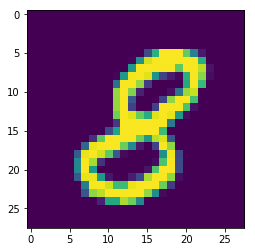

In [11]:
# Display the two-dimensional image with .imshow() method

plt.imshow(sample)

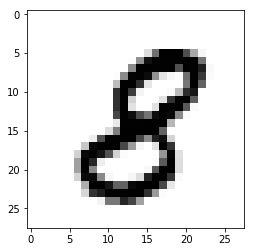

In [12]:
# Display the two-dimensional image with .imshow() method
# cmap -> alters the color of the image

plt.imshow(sample, cmap='Greys')

### Step 4 - Defining Parameters

In [13]:
# Define the (3) parameters for training

## Note:
# learning_rate -> this is how quickly we adjust the cost function (i.e. cost function 
# might be the sum of squared errors over your training set)
# training_epochs -> this is how many training cycles we go through
# batch_size -> this is the size of the batch training data

learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [14]:
# Define Network Paramters

## Note: This decides what the neural network will look like
# n_classes -> number of classes; we have written numbers 0 to 9 in the dataset, so this is 10
# n_samples -> number of samples in the dataset
# n_input -> the expected inputs; we have a 28 x 28 image that flattens to 784 in this example
# n_hidden_1/ _2 -> the number of neurons in the hidden layers (i.e. common to use 256 for images)


n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256


### Step 5 - Create Functions for Multi-Layer Perceptron

In [32]:
# Create multi-layer perceptron function

## Note:
# Function takes (3) arguments
# x -> data inputs
# weights -> random normally distributed values based on required data shape
# bias -> random normally distributed values based on required data shape

def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    # (X * W + B) -> (x = data) multiplied by (W = Weights randomly selected), then added by (B = Bias)
    layer_1 = tf.add(tf.matmul(x, weights['h1']),biases['b1'])
    
    # Function(X * W + B) = RELU is our function -> f(x) = max(0,x) --> This is the activation part
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer with RELU Activation
    # (X * W + B) -> (x = data) multiplied by (W = Weights randomly selected), then added by (B = Bias)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    
    # Function(X * W + B) = RELU is our function -> f(x) = max(0,x) --> This is the activation part
    layer_2 = tf.nn.relu(layer_2)

In [28]:
# Create Weights Dictionary

## Note: Remember the flow from input -> to hidden layer -> to output
# tf.Variable -> allows us to be aware of state
# tf.random_normal -> allows us to generate normally distributed values for a given matrix shape
# n_classes -> allows us to create a matrix identifying the value

## example output => [0,0,0,1,0,0,0,0,0,0] -> this would mean the output guess is 3

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [29]:
# Create Bias Dictionary

## Note: Remember the flow from input -> to hidden layer -> to output
# tf.Variable -> allows us to be aware of state
# tf.random_normal -> allows us to generate normally distributed values for a given matrix shape
# n_classes -> allows us to create a matrix identifying the value

## example output => [0,0,0,1,0,0,0,0,0,0] -> this would mean the output guess is 3

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [30]:
# Create two (2) placeholders for the x and y variables

x = tf.placeholder('float', [None,n_input])

y = tf.placeholder('float', [None, n_classes])


### Step 6 - Set the perceptron function and create the model



In [34]:
# Create model with perceptron function

pred = multilayer_perceptron(x, weights, biases)

### Step 7 - Define cost and optimizer

In [36]:
# Define the cost to review errors with model

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

ValueError: Both labels and logits must be provided.

In [15]:
## Topic -

In [16]:
## Topic -

In [17]:
### Step 1 -

In [18]:
### Step 1 -